In [ ]:
import pandas as pd
import numpy as np

In [ ]:
!cp /content/drive/MyDrive/DATASET.xlsx /content/road_data.xlsx

In [ ]:
road_data = pd.read_excel("/content/road_data.xlsx")

/usr/local/lib/python3.7/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/usr/local/lib/python3.7/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


In [ ]:
road_data.head()

,Unnamed: 0,year,Para-1,Para-2,Para-3,Para-4,Para-5,Para-6,Para-7,Para-8,Para-9,Para-10,Para-11,Para-12,Para-13
0,Sec_1,1,324.0,354.5,17.0,0.0,3.0,117.0,2600.0,400.0,0.0,0.0,0.0,0.0,1.52
1,NaN,2,324.0,161.1,18.2,0.0,4.0,106.0,5950.0,1190.0,0.0,3.4,0.0,0.0,1.62
2,NaN,3,324.0,170.7,18.5,0.0,4.0,110.0,5950.0,1190.0,0.0,21.3,0.0,4.0,1.68
3,NaN,4,324.0,223.9,18.9,0.0,3.0,110.0,6150.0,1340.0,0.0,21.3,0.0,5.0,1.78
4,NaN,5,324.0,228.2,18.4,0.0,2.0,113.0,6340.0,1450.0,0.0,23.9,0.0,7.0,1.80


In [ ]:
n = len(road_data)
j = 0
k = 0
for i in range(n):
    temp = road_data.iloc[k, 0]
    if(temp.startswith('Sec')):
        num = str(temp).split('_')[1]
    else :
        num = int(temp)
    road_data.iloc[j, 0] = num
    j += 1
    if(j%10 == 0):
        k += 10

In [ ]:
road_data.columns = road_data.columns.str.replace('Unnamed: 0', 'Group')
road_data.columns = road_data.columns.str.replace('-', '_')
road_data.fillna(0, inplace=True)
road_data["Group"] = road_data["Group"].astype(int)

## PLOTTING

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams

from matplotlib import rc
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
sns.set(style = 'whitegrid',palette = 'muted',font_scale = 1.5)
rcParams['figure.figsize'] = 22,10

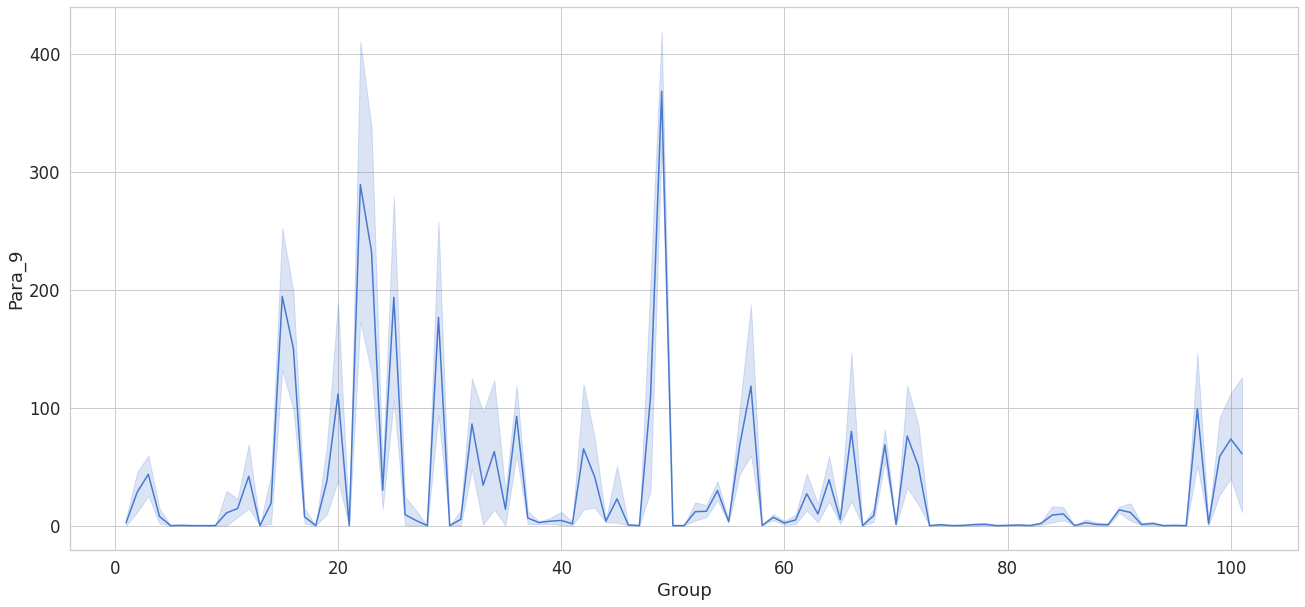

In [ ]:
sns.lineplot(x = road_data.Group, y = 'Para_9',data = road_data)

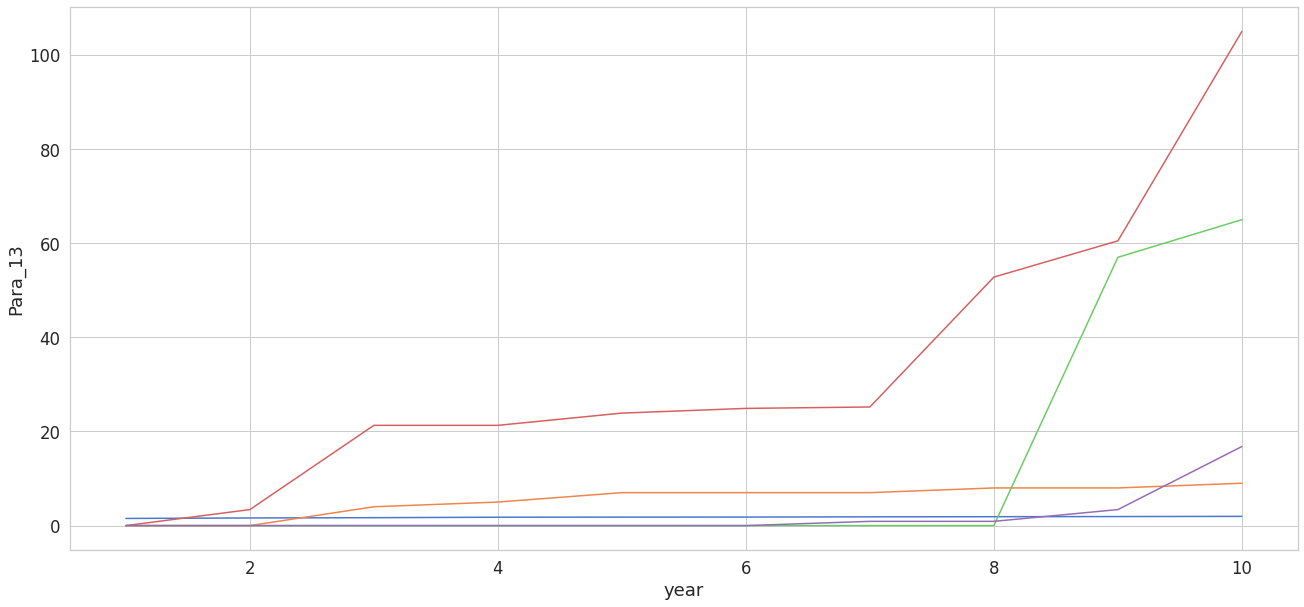

In [ ]:
road_data_sec1 = road_data.loc[road_data['Group'] == 1]
sns.lineplot(x =road_data_sec1.year, y = 'Para_13',data = road_data_sec1)
sns.lineplot(x =road_data_sec1.year, y = 'Para_12',data = road_data_sec1)
sns.lineplot(x =road_data_sec1.year, y = 'Para_11',data = road_data_sec1)
sns.lineplot(x =road_data_sec1.year, y = 'Para_10',data = road_data_sec1)
sns.lineplot(x =road_data_sec1.year, y = 'Para_9',data = road_data_sec1)

## PreProcessing

In [ ]:
test_dataset = road_data.loc[road_data['year'] == 10]
test_dataset.head

<bound method NDFrame.head of       Group  year  Para_1  Para_2  Para_3  Para_4  Para_5  Para_6   Para_7  \
9         1    10   324.0    53.6    19.0     0.0     2.0   105.0   7567.0   
19        2    10   327.7    62.0    22.7     0.0     2.0   102.0  30525.0   
29        3    10   487.7    93.2    22.5     0.0     4.0   110.0   2140.0   
39        4    10   543.6    93.2    22.5     0.0     4.0   110.0   2140.0   
49        5    10   434.4   149.0    11.7    72.0     3.0   110.0  13142.0   
...     ...   ...     ...     ...     ...     ...     ...     ...      ...   
969      97    10   514.0  1226.4    10.1   203.6    16.0   114.0   7672.0   
979      98    10   901.0  1531.0    11.1    34.9    40.0   100.0  15150.0   
989      99    10  1181.0  1364.9     9.2   274.3    24.0   112.0  12500.0   
999     100    10   662.0  1110.7    12.8    33.2    27.0   117.0   3324.0   
1009    101    10   454.0   986.3    14.3    67.0    24.0   122.0   4415.0   

       Para_8  Para_9  Para_10  P

In [ ]:
pred_cols = ['Para_9', 'Para_10', 'Para_11', 'Para_12', 'Para_13']
res = {'Para_9': [], 'Para_10': [], 'Para_11': [], 'Para_12': [], 'Para_13': []}

## MODELLING

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

In [ ]:
model = GradientBoostingRegressor()
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)

In [ ]:
def select_model(val):
    rmse = []
    N = 0
    index = 0
    if(val==0):
        for j in [10, 11, 12, 13, 14]:
            ans = 0
            count = 0
            for i in range(0, 1000, 10):
                x_train = road_data.iloc[i:i+9, 1:10]
                y_train = road_data.iloc[i:i+9, j]
                x_test = road_data.iloc[i+9, 1:10].to_numpy()
                y_test = road_data.iloc[i+9, j]
                model.fit(x_train.values, y_train.values)

                y_pred = model.predict((x_test.reshape(1,-1)))[0]

                res[pred_cols[index]].append(y_pred)
                ans += (y_test - y_pred)**2
                count += 1
                N += 1
            rmse.append(ans)
            index += 1
            
    else:
        for j in [10, 11, 12, 13, 14]:
            ans = 0
            count = 0
            for i in range(0, 1000, 10):
                x_train = road_data.iloc[i:i+9, 1:10]
                y_train = road_data.iloc[i:i+9, j]
                x_test = road_data.iloc[i+9, 1:10].to_numpy()
                y_test = road_data.iloc[i+9, j]

                rf.fit(x_train.values, y_train.values)
                y_pred = rf.predict((x_test.reshape(1,-1)))[0]

                res[pred_cols[index]].append(y_pred)
                ans += (y_test - y_pred)**2
                count += 1
                N += 1

            rmse.append(ans)
            index += 1
    return (rmse, count)

In [ ]:
res_rmse, res_count = select_model(1)

## Calculations:

In [ ]:
print(res_rmse)

[428664.1624564081, 408401.118651198, 67723.59325377778, 21990.72820864198, 5.278937982148018]


In [ ]:
for i in res_rmse:
    print((i/res_count)**0.5)

65.47244935516069
63.90626875754819
26.023757079595136
14.829271124583967
0.22975939550207775


In [ ]:
print((sum(res_rmse)/500)**0.5)

43.053103988168104
